In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets, layers, models
import numpy as np                                        #Importing necessary packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import skimage.feature
from sklearn.metrics import confusion_matrix , classification_report


Loading data set and exploring more about data like shape of data and displaying sample image

Training Images Shape: (32, 32, 3, 50000)
Testing Images Shape: (32, 32, 3, 10000)
Images Fine train Labels Shape: (50000,)
Images Coarse train Labels Shape: (50000,)
Images Fine test Labels Shape: (10000,)
Images Coarse test Labels Shape: (10000,)


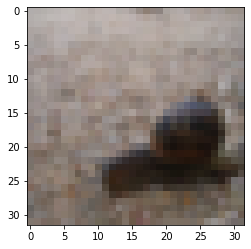

In [ ]:
tr_images = np.load('trnImage.npy')
label_fine = np.load('trnLabel_fine.npy')
label_coarse = np.load('trnLabel_coarse.npy')
ts_images=np.load('tstImage.npy')
ts_lab_fine=np.load('tstLabel_fine.npy')
ts_lab_coarse=np.load('tstLabel_coarse.npy')
print(f'Training Images Shape: {tr_images.shape}')
print(f'Testing Images Shape: {ts_images.shape}')
print(f'Images Fine train Labels Shape: {label_fine.shape}')
print(f'Images Coarse train Labels Shape: {label_coarse.shape}')    #printing shapes of train and test  data,labels
print(f'Images Fine test Labels Shape: {ts_lab_fine.shape}')
print(f'Images Coarse test Labels Shape: {ts_lab_coarse.shape}')


image_index = 655
image = tr_images[:, :, :, image_index]
plt.imshow(image) # Displaying a image from training dataset


In [ ]:

split_test_fine=ts_lab_fine[:10]  #Slicing test fine labels for confusion matrix computataion
classes=['mountain','forest','seal','Mushrooms','sea','tulips','camel','butterfly','cloud','apples'] #Classes of first 10 testing data
print(classes)
print(split_test_fine)

['mountain', 'forest', 'seal', 'Mushrooms', 'sea', 'tulips', 'camel', 'butterfly', 'cloud', 'apples']
[49 33 72 51 71 92 15 14 23  0]


Neural network implementation for fine label

In [ ]:
trans_train_images=np.transpose(tr_images, [3,0,1,2])
print(f'Shape of transposed: {trans_train_images.shape}')
                                                             #Transposing train and test image data
trans_ts_images=np.transpose(ts_images, [3,0,1,2])
print(f'Shape of transposed: {trans_ts_images.shape}')




model=tf.keras.Sequential(layers=[tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(4000,activation=tf.nn.relu),
    tf.keras.layers.Dense(2000,activation=tf.nn.relu),                #Creating training model
    tf.keras.layers.Dense(100,activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),  #Adding compile parameters
             metrics=tf.keras.metrics.SparseCategoricalAccuracy())
Capture_Anaysis=model.fit(trans_train_images,label_fine, epochs=20,validation_split=0.2)#Fitting train data and train labels


Shape of transposed: (50000, 32, 32, 3)
Shape of transposed: (10000, 32, 32, 3)
Epoch 1/20
1250/1250 [==============================] - 88s 70ms/step - loss: 4.1376 - sparse_categorical_accuracy: 0.0774 - val_loss: 3.8870 - val_sparse_categorical_accuracy: 0.1130
Epoch 2/20
1250/1250 [==============================] - 85s 68ms/step - loss: 3.7586 - sparse_categorical_accuracy: 0.1361 - val_loss: 3.7024 - val_sparse_categorical_accuracy: 0.1475
Epoch 3/20
1250/1250 [==============================] - 85s 68ms/step - loss: 3.5950 - sparse_categorical_accuracy: 0.1667 - val_loss: 3.5842 - val_sparse_categorical_accuracy: 0.1723
Epoch 4/20
1250/1250 [==============================] - 86s 68ms/step - loss: 3.4835 - sparse_categorical_accuracy: 0.1876 - val_loss: 3.5540 - val_sparse_categorical_accuracy: 0.1726
Epoch 5/20
1250/1250 [==============================] - 87s 69ms/step - loss: 3.3937 - sparse_categorical_accuracy: 0.2057 - val_loss: 3.5126 - val_sparse_categorical_accuracy: 0.1812


In [ ]:
pre_d=model.predict(trans_ts_images)#Predicting labels for testing data
predict_class=[np.argmax(element) for element in pre_d ]#calculate argmax(highest element index value from predicted data)
print(predict_class[:10])
print(split_test_fine)
print(classification_report(ts_lab_fine,predict_class))#Classification report
matrix=confusion_matrix(split_test_fine,predict_class[:10]) #Computing confusion matix by passing sliced test fine labels and predicted labes
print(matrix)


[49, 63, 15, 10, 71, 6, 63, 7, 71, 10]
[49 33 72 51 71 92 15 14 23  0]
              precision    recall  f1-score   support

           0       0.41      0.55      0.47       100
           1       0.29      0.48      0.36       100
           2       0.19      0.25      0.22       100
           3       0.13      0.05      0.07       100
           4       0.20      0.09      0.12       100
           5       0.20      0.21      0.20       100
           6       0.30      0.19      0.23       100
           7       0.19      0.40      0.26       100
           8       0.15      0.28      0.20       100
           9       0.53      0.25      0.34       100
          10       0.13      0.10      0.11       100
          11       0.20      0.14      0.16       100
          12       0.58      0.07      0.13       100
          13       0.33      0.06      0.10       100
          14       0.24      0.12      0.16       100
          15       0.33      0.06      0.10       100
          

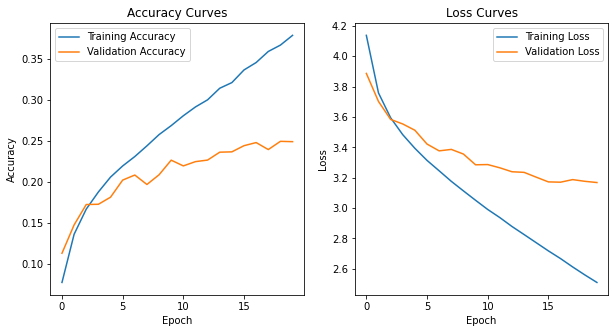

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(Capture_Anaysis.history['sparse_categorical_accuracy'])
plt.plot(Capture_Anaysis.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')
                                             #plotting Accuracy and loss curves for training and validation
plt.subplot(122)
plt.plot(Capture_Anaysis.history['loss'])
plt.plot(Capture_Anaysis.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [ ]:
Outcome = model.evaluate(trans_ts_images, ts_lab_fine)
print(f'Test set loss: {Outcome[0]:0.2f}, test set accuracy: {Outcome[1]*100:0.2f}%')#Evaluating trained model by printing accuaracy and loss of test data

313/313 [==============================] - 7s 22ms/step - loss: 3.1601 - sparse_categorical_accuracy: 0.2564
Test set loss: 3.16, test set accuracy: 25.64%


Neural network implementation for Coarse label

In [ ]:
trans_train_images=np.transpose(tr_images, [3,0,1,2])
print(f'Shape of transposed: {trans_train_images.shape}')
                                                         #Transposing train and test image data
trans_ts_images=np.transpose(ts_images, [3,0,1,2])
print(f'Shape of transposed: {trans_ts_images.shape}')




model=tf.keras.Sequential(layers=[tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(4000,activation=tf.nn.relu),
    tf.keras.layers.Dense(2000,activation=tf.nn.relu),      #Creating training model
    tf.keras.layers.Dense(100,activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(), #Adding compile parameters
             metrics=tf.keras.metrics.SparseCategoricalAccuracy())
Capture_Anaysis=model.fit(trans_train_images,label_coarse, epochs=20,validation_split=0.2)#Fitting train data and train labels

Shape of transposed: (50000, 32, 32, 3)
Shape of transposed: (10000, 32, 32, 3)
Epoch 1/20
1250/1250 [==============================] - 106s 85ms/step - loss: 2.7021 - sparse_categorical_accuracy: 0.1847 - val_loss: 2.4412 - val_sparse_categorical_accuracy: 0.2445
Epoch 2/20
1250/1250 [==============================] - 106s 85ms/step - loss: 2.4054 - sparse_categorical_accuracy: 0.2563 - val_loss: 2.4236 - val_sparse_categorical_accuracy: 0.2473
Epoch 3/20
1250/1250 [==============================] - 107s 86ms/step - loss: 2.3245 - sparse_categorical_accuracy: 0.2792 - val_loss: 2.3236 - val_sparse_categorical_accuracy: 0.2839
Epoch 4/20
1250/1250 [==============================] - 106s 85ms/step - loss: 2.2741 - sparse_categorical_accuracy: 0.2941 - val_loss: 2.2650 - val_sparse_categorical_accuracy: 0.3025
Epoch 5/20
1250/1250 [==============================] - 106s 85ms/step - loss: 2.2350 - sparse_categorical_accuracy: 0.3063 - val_loss: 2.2949 - val_sparse_categorical_accuracy: 0.

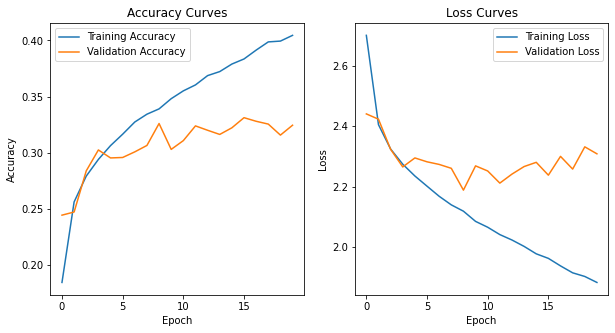

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(Capture_Anaysis.history['sparse_categorical_accuracy'])
plt.plot(Capture_Anaysis.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')
                                   #plotting Accuracy and loss curves for training and validation
plt.subplot(122)
plt.plot(Capture_Anaysis.history['loss'])
plt.plot(Capture_Anaysis.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [ ]:
Outcome = model.evaluate(trans_ts_images, ts_lab_coarse)#Evaluating trained model by printing accuaracy and loss of test data
print(f'Test set loss: {Outcome[0]:0.2f}, test set accuracy: {Outcome[1]*100:0.2f}%')

313/313 [==============================] - 9s 29ms/step - loss: 2.3150 - sparse_categorical_accuracy: 0.3170
Test set loss: 2.32, test set accuracy: 31.70%


Convolutional neural network implementation for fine label

In [ ]:



trans_train_images=np.transpose(tr_images, [3,0,1,2])
print(f'Shape of transposed: {trans_train_images.shape}')
                                                          #Transposing train and test image data
trans_ts_images=np.transpose(ts_images, [3,0,1,2])
print(f'Shape of transposed: {trans_ts_images.shape}')

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))                                          #Creating training model
model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu',input_shape = (32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(400,activation = 'relu'))
model.add(tf.keras.layers.Dense(100, activation= 'softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=tf.keras.metrics.SparseCategoricalAccuracy())     #Adding compile parameters




Capture_Anaysis=model.fit(trans_train_images,label_fine, epochs=20,validation_split=0.2)#Fitting train data and train labels

Shape of transposed: (50000, 32, 32, 3)
Shape of transposed: (10000, 32, 32, 3)
Epoch 1/20
1250/1250 [==============================] - 48s 38ms/step - loss: 4.5240 - sparse_categorical_accuracy: 0.0233 - val_loss: 4.2873 - val_sparse_categorical_accuracy: 0.0524
Epoch 2/20
1250/1250 [==============================] - 48s 39ms/step - loss: 4.0885 - sparse_categorical_accuracy: 0.0776 - val_loss: 3.9555 - val_sparse_categorical_accuracy: 0.0999
Epoch 3/20
1250/1250 [==============================] - 50s 40ms/step - loss: 3.7880 - sparse_categorical_accuracy: 0.1306 - val_loss: 3.6714 - val_sparse_categorical_accuracy: 0.1542
Epoch 4/20
1250/1250 [==============================] - 50s 40ms/step - loss: 3.5589 - sparse_categorical_accuracy: 0.1735 - val_loss: 3.5202 - val_sparse_categorical_accuracy: 0.1806
Epoch 5/20
1250/1250 [==============================] - 50s 40ms/step - loss: 3.3501 - sparse_categorical_accuracy: 0.2108 - val_loss: 3.3498 - val_sparse_categorical_accuracy: 0.2080


In [ ]:
pre_d=model.predict(trans_ts_images)#Predicting labels for testing data
predict_class=[np.argmax(element) for element in pre_d ]#calculate argmax(highest element index value from predicted data)
print(predict_class[:10])
print(split_test_fine)
print(classification_report(ts_lab_fine,predict_class))#Classification report
matrix=confusion_matrix(split_test_fine,predict_class[:10])#Computing confusion matix by passing sliced test fine labels and predicted labes
print(matrix)

[12, 80, 6, 54, 71, 34, 65, 14, 23, 92]
[49 33 72 51 71 92 15 14 23  0]
              precision    recall  f1-score   support

           0       0.54      0.67      0.60       100
           1       0.53      0.24      0.33       100
           2       0.23      0.22      0.22       100
           3       0.24      0.11      0.15       100
           4       0.23      0.16      0.19       100
           5       0.20      0.24      0.22       100
           6       0.31      0.41      0.35       100
           7       0.53      0.25      0.34       100
           8       0.65      0.33      0.44       100
           9       0.43      0.41      0.42       100
          10       0.19      0.17      0.18       100
          11       0.29      0.10      0.15       100
          12       0.29      0.37      0.33       100
          13       0.23      0.41      0.29       100
          14       0.37      0.27      0.31       100
          15       0.28      0.23      0.25       100
         

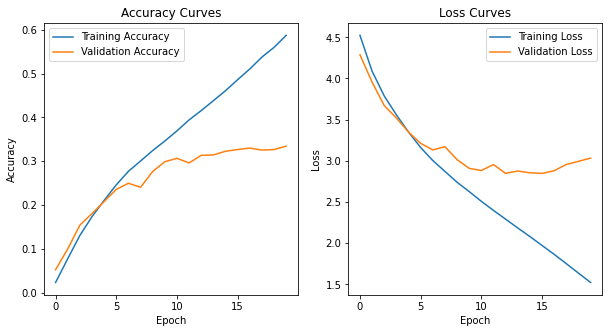

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(Capture_Anaysis.history['sparse_categorical_accuracy'])
plt.plot(Capture_Anaysis.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')
                                                   #plotting Accuracy and loss curves for training and validation
plt.subplot(122)
plt.plot(Capture_Anaysis.history['loss'])
plt.plot(Capture_Anaysis.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [ ]:
Outcome = model.evaluate(trans_ts_images, ts_lab_fine)#Evaluating trained model by printing accuaracy and loss of test data
print(f'Test set loss: {Outcome[0]:0.2f}, test set accuracy: {Outcome[1]*100:0.2f}%')

313/313 [==============================] - 4s 11ms/step - loss: 2.9542 - sparse_categorical_accuracy: 0.3431
Test set loss: 2.95, test set accuracy: 34.31%


Convolutional neural network implementation for coarse label

In [ ]:
trans_train_images=np.transpose(tr_images, [3,0,1,2])
print(f'Shape of transposed: {trans_train_images.shape}')
                                                         #Transposing train and test image data
trans_ts_images=np.transpose(ts_images, [3,0,1,2])
print(f'Shape of transposed: {trans_ts_images.shape}')

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))                                         #Creating training model
model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu',input_shape = (32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(400,activation = 'relu'))
model.add(tf.keras.layers.Dense(100, activation= 'softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),#Adding compile parameters
             metrics=tf.keras.metrics.SparseCategoricalAccuracy())
Capture_Anaysis=model.fit(trans_train_images,label_coarse, epochs=20,validation_split=0.2)#Fitting train data and train labels


Shape of transposed: (50000, 32, 32, 3)
Shape of transposed: (10000, 32, 32, 3)
Epoch 1/20
1250/1250 [==============================] - 48s 38ms/step - loss: 2.8599 - sparse_categorical_accuracy: 0.1314 - val_loss: 2.6588 - val_sparse_categorical_accuracy: 0.1798
Epoch 2/20
1250/1250 [==============================] - 47s 38ms/step - loss: 2.5688 - sparse_categorical_accuracy: 0.2093 - val_loss: 2.5100 - val_sparse_categorical_accuracy: 0.2232
Epoch 3/20
1250/1250 [==============================] - 48s 38ms/step - loss: 2.4254 - sparse_categorical_accuracy: 0.2563 - val_loss: 2.3596 - val_sparse_categorical_accuracy: 0.2786
Epoch 4/20
1250/1250 [==============================] - 47s 38ms/step - loss: 2.2937 - sparse_categorical_accuracy: 0.2980 - val_loss: 2.2940 - val_sparse_categorical_accuracy: 0.3059
Epoch 5/20
1250/1250 [==============================] - 48s 39ms/step - loss: 2.1808 - sparse_categorical_accuracy: 0.3343 - val_loss: 2.1650 - val_sparse_categorical_accuracy: 0.3385


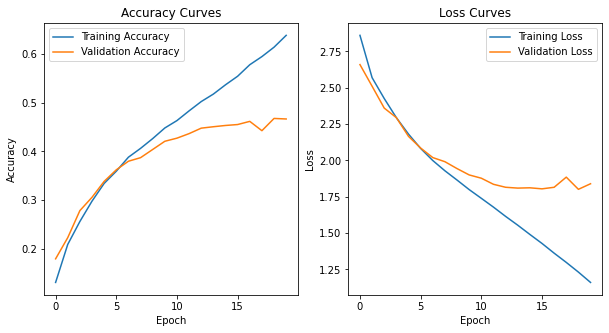

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(Capture_Anaysis.history['sparse_categorical_accuracy'])
plt.plot(Capture_Anaysis.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')
                                          #plotting Accuracy and loss curves for training and validation
plt.subplot(122) 
plt.plot(Capture_Anaysis.history['loss'])
plt.plot(Capture_Anaysis.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [ ]:
Outcome = model.evaluate(trans_ts_images, ts_lab_coarse)#Evaluating trained model by printing accuaracy and loss of test data
print(f'Test set loss: {Outcome[0]:0.2f}, test set accuracy: {Outcome[1]*100:0.2f}%')

313/313 [==============================] - 4s 12ms/step - loss: 1.8383 - sparse_categorical_accuracy: 0.4637
Test set loss: 1.84, test set accuracy: 46.37%


Code references

https://colab.research.google.com/drive/1yAEMt0P0TreMrDaR3N7rOFQG6YsQd1ue#scrollTo=c0Zy7WKq04NS

https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

https://colab.research.google.com/drive/12e5_Ii-HY1ktW24CeMgFeHm7MiU_l5ZC#scrollTo=LQKkHyJvTLAB